In [1]:
pip install pandas openpyxl jupyter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
file_path = "/raid/home/somayeh.shami/project/somayeh_workspace/Fertility_project/Filled_Fertility_Dataset.xlsx"
fertility_data = pd.read_excel(file_path)

# Display the first few rows
fertility_data.head()

/raid/home/somayeh.shami/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,Patient_ID,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Marital_Status,Sperm_Abnormalities,Varicocele,Ejaculatory_Disorders,...,Vitamin_Mineral_Deficiencies,Sleep_Disorders,Environmental_Toxins,Fertility_Classification,Infertility_Likelihood (%),Risk_Group,Infertility_Cause,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,Demographic Data,NaN,Demographic Data,NaN,Demographic Data,Demographic Data,Demographic Data,Disorders for Men,Disorders for Men,Disorders for Men,...,Shared Disorders,Shared Disorders,Shared Disorders,Results,NaN,Results,Results,Suggested_Tests,Fertility_Status_Based_On_Tests,Recommendations
1,P0001,31.0,Male,18.5,Non-Smoker,Moderate,Married,NaN,No,No,...,NaN,NaN,NaN,Infertile,39.61,Low,Ovulation Disorders,Thyroid function test,Fertile,No recommendations needed; fertility status is...
2,P0002,30.0,Female,29.6,Heavy Smoker,NaN,Married,NaN,NaN,NaN,...,NaN,NaN,NaN,Fertile,61.63,Moderate,NaN,"Thyroid function test, Stress hormone test (co...",Subfertile,Treat thyroid imbalances with levothyroxine or...
3,P0003,33.0,Female,19.2,Light Smoker,Moderate,Married,NaN,NaN,NaN,...,NaN,NaN,NaN,Fertile,71.25,Moderate,NaN,"Ovarian reserve test, Stress hormone test (cor...",Infertile,Ovarian reserve testing followed by IVF with e...
4,P0004,31.0,Female,24.9,Non-Smoker,NaN,Divorced,NaN,NaN,NaN,...,NaN,NaN,NaN,Fertile,53.58,Moderate,Ovulation Disorders,Hysterosalpingography (HSG),Subfertile,Laparoscopic surgery to remove endometrial tis...


In [3]:
# Basic info about the dataset
fertility_data.info()

# Check for missing values
missing_values = fertility_data.isnull().sum()

# Check for duplicates
duplicates = fertility_data.duplicated().sum()

# Summarize numeric columns
summary_statistics = fertility_data.describe()

# Display results
print(f"Missing Values:\n{missing_values}")
print(f"\nNumber of Duplicates: {duplicates}")
print(f"\nSummary Statistics:\n{summary_statistics}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    1001 non-null   object 
 1   Age                           1000 non-null   float64
 2   Gender                        1001 non-null   object 
 3   BMI                           1000 non-null   float64
 4   Smoking_Status                1001 non-null   object 
 5   Alcohol_Consumption           521 non-null    object 
 6   Marital_Status                1001 non-null   object 
 7   Sperm_Abnormalities           242 non-null    object 
 8   Varicocele                    437 non-null    object 
 9   Ejaculatory_Disorders         437 non-null    object 
 10  Undescended_Testicles         437 non-null    object 
 11  Obstructive_Disorders         123 non-null    object 
 12  Sperm_DNA_Damage              128 non-null    object 
 13  Ovu

# Fertility Dataset Cleaning Process

## Objectives:
1. Handle missing values.
2. Remove irrelevant columns.
3. Normalize column names.
4. Prepare the dataset for analysis.

## Cleaning Steps:
1. **Dropped Columns**:
   - Removed irrelevant columns: `Unnamed: 32`, `Unnamed: 33`, and `Unnamed: 34`.

2. **Handled Missing Values**:
   - Imputed numeric columns (`Age`, `BMI`, `Infertility_Likelihood (%)`) with the mean.
   - Filled missing values in categorical columns with `Unknown`.

3. **Normalized Column Names**:
   - Converted all column names to lowercase and replaced spaces with underscores.

4. **Saved Cleaned Dataset**:
   - Saved the cleaned dataset as `Cleaned_Fertility_Dataset.xlsx` for further analysis.


In [ ]:
# Drop irrelevant columns
fertility_data_cleaned = fertility_data.drop(columns=['Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34'])

# Impute missing values
fertility_data_cleaned['Age'].fillna(fertility_data_cleaned['Age'].mean(), inplace=True)
fertility_data_cleaned['BMI'].fillna(fertility_data_cleaned['BMI'].mean(), inplace=True)
fertility_data_cleaned['Infertility_Likelihood (%)'].fillna(fertility_data_cleaned['Infertility_Likelihood (%)'].mean(), inplace=True)

# Replace missing categorical values with 'Unknown'
categorical_columns = fertility_data_cleaned.select_dtypes(include='object').columns
for col in categorical_columns:
    fertility_data_cleaned[col].fillna('Unknown', inplace=True)

# Normalize column names
fertility_data_cleaned.columns = [col.strip().lower().replace(' ', '_') for col in fertility_data_cleaned.columns]

# Display cleaned dataset info
fertility_data_cleaned.info()

# Save the cleaned dataset
cleaned_file_path = "/raid/home/somayeh.shami/project/somayeh_workspace/Fertility_project/Cleaned_Fertility_Dataset.xlsx"
fertility_data_cleaned.to_excel(cleaned_file_path, index=False)

In [8]:
# Remove the first row with metadata
fertility_data_cleaned = fertility_data_cleaned.iloc[1:]

# Reset the index for consistency
fertility_data_cleaned.reset_index(drop=True, inplace=True)

# Impute missing values for numeric columns
fertility_data_cleaned['age'] = fertility_data_cleaned['age'].fillna(fertility_data_cleaned['age'].mean())
fertility_data_cleaned['bmi'] = fertility_data_cleaned['bmi'].fillna(fertility_data_cleaned['bmi'].mean())
fertility_data_cleaned['infertility_likelihood_(%)'] = fertility_data_cleaned['infertility_likelihood_(%)'].fillna(
    fertility_data_cleaned['infertility_likelihood_(%)'].mean())

# Replace missing categorical values with 'Unknown'
categorical_columns = fertility_data_cleaned.select_dtypes(include='object').columns
for col in categorical_columns:
    fertility_data_cleaned[col] = fertility_data_cleaned[col].fillna('Unknown')

# Save the finalized cleaned dataset
final_cleaned_file_path = "/raid/home/somayeh.shami/project/somayeh_workspace/Fertility_project/Final_Cleaned_Fertility_Dataset.xlsx"
fertility_data_cleaned.to_excel(final_cleaned_file_path, index=False)

              age         bmi  infertility_likelihood_(%)
count  997.000000  997.000000                  997.000000
mean    33.211635   26.549348                   52.351775
std      6.569091    4.877138                   29.065606
min     22.000000   18.000000                    0.010000
25%     28.000000   22.300000                   27.430000
50%     34.000000   26.600000                   52.260000
75%     39.000000   30.500000                   78.920000
max     44.000000   35.000000                   99.930000


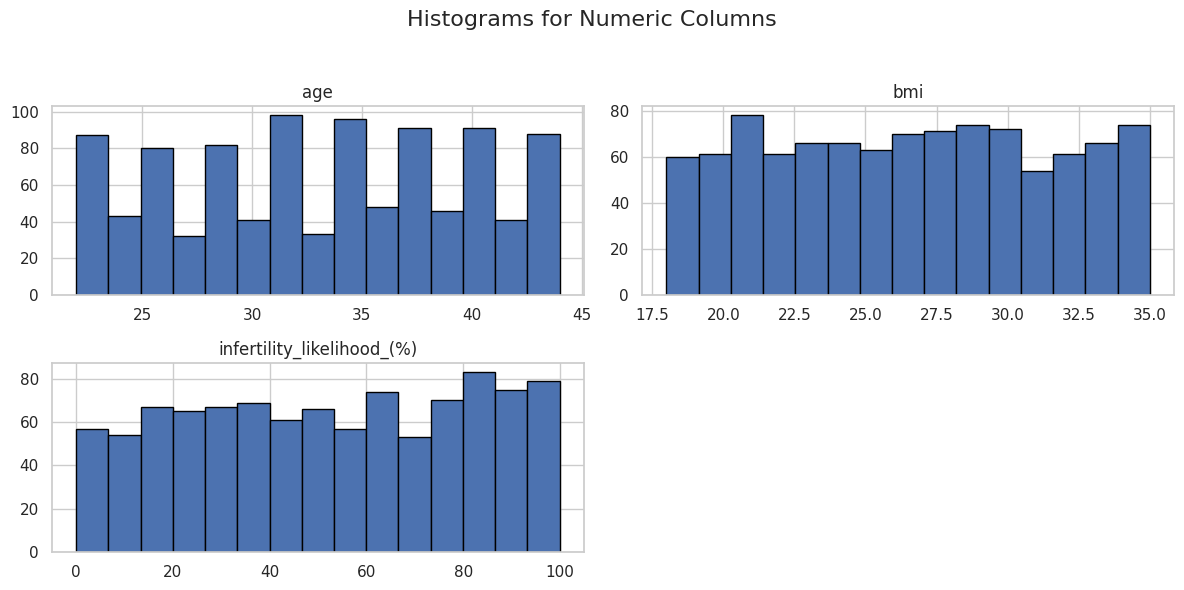

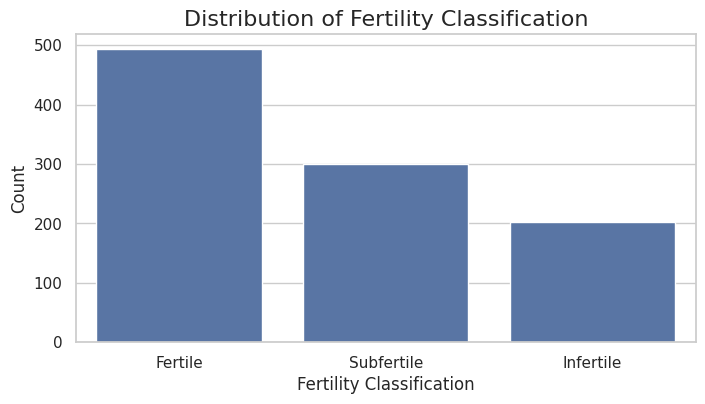

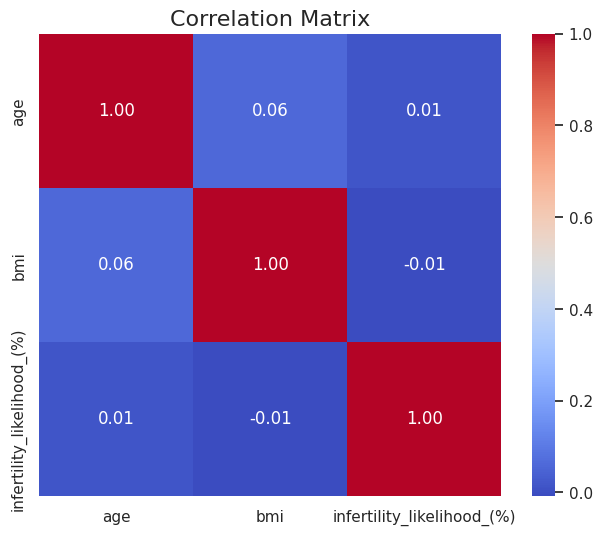

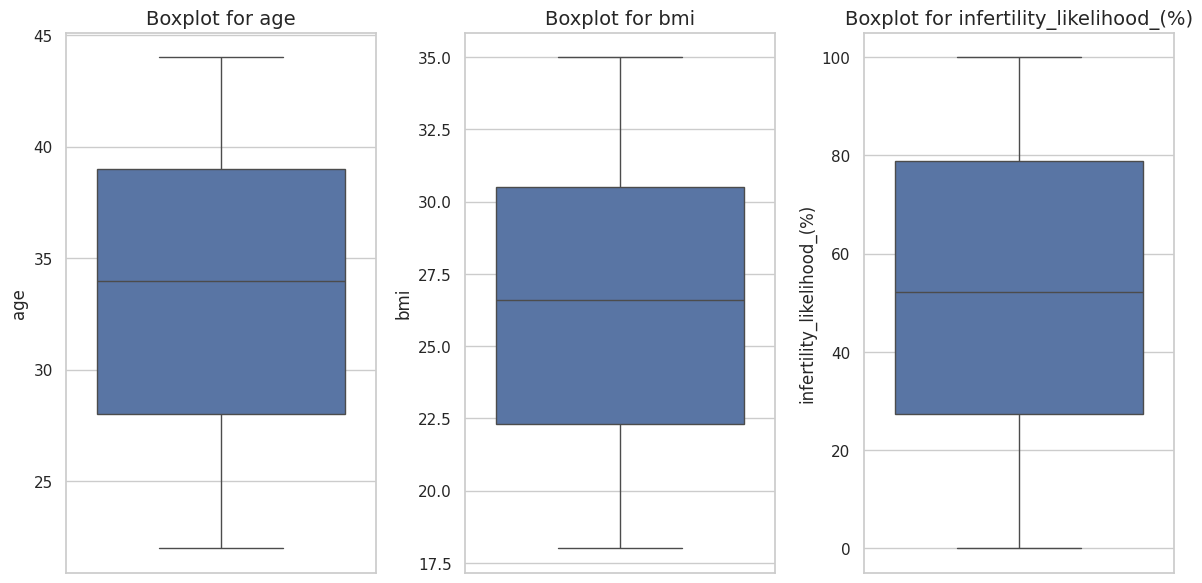

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set_theme(style="whitegrid")

# Load the dataset
file_path = "/raid/home/somayeh.shami/project/somayeh_workspace/Fertility_project/Final_Cleaned_Fertility_Dataset.xlsx"
fertility_data = pd.read_excel(file_path)

# 1. Summary Statistics for Numeric Columns
numeric_summary = fertility_data.describe()
print(numeric_summary)

# 2. Distribution of Numeric Columns
fertility_data[['age', 'bmi', 'infertility_likelihood_(%)']].hist(
    bins=15, figsize=(12, 6), edgecolor='black'
)
plt.suptitle("Histograms for Numeric Columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 3. Distribution of Fertility Classification
plt.figure(figsize=(8, 4))
sns.countplot(
    data=fertility_data,
    x='fertility_classification',
    order=fertility_data['fertility_classification'].value_counts().index
)
plt.title("Distribution of Fertility Classification", fontsize=16)
plt.xlabel("Fertility Classification")
plt.ylabel("Count")
plt.show()

# 4. Correlation Matrix for Numeric Columns
plt.figure(figsize=(8, 6))
correlation_matrix = fertility_data[['age', 'bmi', 'infertility_likelihood_(%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# 5. Boxplots for Outlier Detection in Numeric Columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(['age', 'bmi', 'infertility_likelihood_(%)'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=fertility_data, y=col)
    plt.title(f"Boxplot for {col}", fontsize=14)
plt.tight_layout()
plt.show()